**EXPERIMENTx3 - MNIST DATASET BY 229X1A2856**



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
# 1. Import MNIST dataset
mnist_digits = fetch_openml('mnist_784', version=1, as_frame=False)
x, y = mnist_digits["data"], mnist_digits["target"].astype(int)


In [ ]:
# 2. Data Preprocessing
print("Dataset Info:")
print(pd.DataFrame(x).info())
print("\nHead of Dataset:")
print(pd.DataFrame(x).head())
print("\nTail of Dataset:")
print(pd.DataFrame(x).tail())
print("\nChecking for Missing Values:")
print(pd.DataFrame(x).isnull().sum().sum())
print("\nChecking for Duplicates:")
print(pd.DataFrame(x).duplicated().sum())
print("\nStatistical Summary:")
print(pd.DataFrame(x).describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 418.7 MB
None

Head of Dataset:
   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]

Tail of Dataset:
       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
69995   

In [ ]:
# 3. Shape of Data
print("\nShape of Data:", x.shape)
print("Shape of Target:", y.shape)


Shape of Data: (70000, 784)
Shape of Target: (70000,)


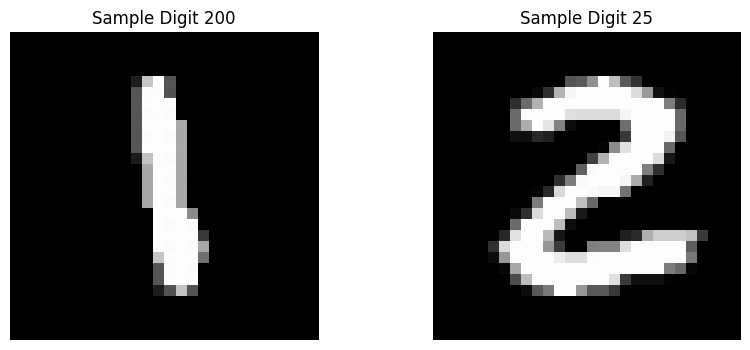

In [ ]:
# 4. Sample Digits Visualization
sample_a = x[200].reshape(28, 28)
sample_b = x[25].reshape(28, 28)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_a, cmap='gray')
plt.title("Sample Digit 200")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sample_b, cmap='gray')
plt.title("Sample Digit 25")
plt.axis("off")
plt.show()

In [ ]:
# 5. Statistical Methods
print("\nMean:", np.mean(x))
print("\nMedian:", np.median(x))
print("\nStandard Deviation:", np.std(x))
print("\nMinimum:", np.min(x))
print("\nMaximum:", np.max(x))



Mean: 33.385964741253645

Median: 0.0

Standard Deviation: 78.65437362689433

Minimum: 0

Maximum: 255


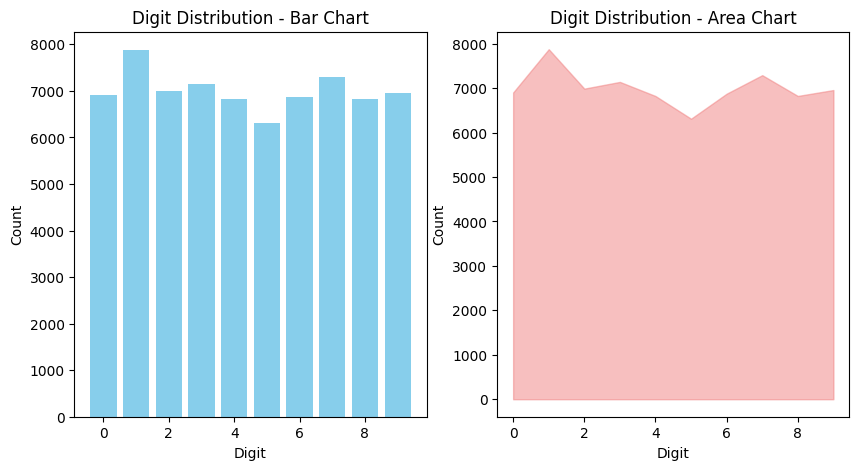

In [ ]:
# 6. Data Visualization - Bar Graph & Area Chart
y = y.astype(int)  # Ensure y is integer type to avoid TypeError

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(10), np.bincount(y, minlength=10), color='skyblue')
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Digit Distribution - Bar Chart")

plt.subplot(1, 2, 2)
plt.fill_between(range(10), np.bincount(y, minlength=10), color='lightcoral', alpha=0.5)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Digit Distribution - Area Chart")
plt.show()

In [ ]:
# 7. Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# 8. Train SGD Classifier
model = SGDClassifier(random_state=42)
model.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
# 9. Predictions
y_pred = model.predict(x_test)

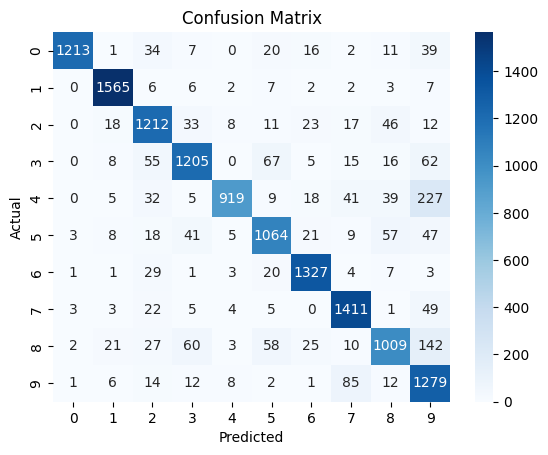

In [ ]:
# 10. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 11. Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8717
Precision: 0.8804
Recall: 0.8717
F1 Score: 0.8721


In [ ]:
# 12. Cross-Validation
cv_scores = cross_val_score(model, x_train, y_train, cv=3, scoring="accuracy")
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.84212782 0.87416296 0.83129755]


In [ ]:
# NumPy Arrays: 1D, 2D, and 3D Basics
# Covers:
# ✅ Creation
# ✅ Indexing (accessing specific elements)
# ✅ Slicing (sub-arrays)
# ✅ Sorting (Ascending & Descending, including in-place)
# This is the 20% core you'll use in 80% of real problems.

import numpy as np

# ------------------- 1D ARRAY -------------------
a = np.array([10, 50, 30, 20, 40])

# Indexing
print("1D - First element:", a[0])     # 10
print("1D - Last element:", a[-1])     # 40

# Slicing
print("1D - Index 1 to 3:", a[1:4])    # [50 30 20]
print("1D - Every 2nd element:", a[::2]) # [10 30 40]

# Sorting
print("1D - Ascending:", np.sort(a))       # [10 20 30 40 50]
print("1D - Descending:", np.sort(a)[::-1]) # [50 40 30 20 10]

# In-place
a.sort()
print("1D - In-place Ascending:", a)
a = a[::-1]
print("1D - In-place Descending:", a)

# ------------------- 2D ARRAY -------------------
b = np.array([[40, 10, 20],
              [70, 50, 60]])

# Indexing
print("2D - Element at [0][1]:", b[0][1])   # 10

# Slicing
print("2D - First row:", b[0])              # [40 10 20]
print("2D - First column:", b[:, 0])        # [40 70]
print("2D - Submatrix [0:2, 1:3]:\n", b[0:2, 1:3])  # [[10 20], [50 60]]

# Sorting
print("2D - Row-wise Ascending:\n", np.sort(b, axis=1)) # Each row sorted
print("2D - Column-wise Ascending:\n", np.sort(b, axis=0)) # Each column sorted

# Descending (no direct way, so reverse sorted output)
print("2D - Row-wise Descending:\n", np.sort(b, axis=1)[:, ::-1])

# ------------------- 3D ARRAY -------------------
c = np.array([[[1, 2], [5, 4]],
              [[8, 6], [7, 3]]])

# Indexing
print("3D - Element at [1][0][1]:", c[1][0][1])  # 6

# Slicing
print("3D - First 2D block:\n", c[0])
print("3D - All 1st rows across 2D blocks:\n", c[:, 0, :])  # shape (2, 2)
print("3D - All 2nd elements of 2nd row in each 2D block:", c[:, 1, 1])  # [4, 3]

# Sorting (applied along the last axis)
print("3D - Sorted along last axis:\n", np.sort(c, axis=-1))

# Descending
print("3D - Descending along last axis:\n", np.sort(c, axis=-1)[..., ::-1])


1D - First element: 10
1D - Last element: 40
1D - Index 1 to 3: [50 30 20]
1D - Every 2nd element: [10 30 40]
1D - Ascending: [10 20 30 40 50]
1D - Descending: [50 40 30 20 10]
1D - In-place Ascending: [10 20 30 40 50]
1D - In-place Descending: [50 40 30 20 10]
2D - Element at [0][1]: 10
2D - First row: [40 10 20]
2D - First column: [40 70]
2D - Submatrix [0:2, 1:3]:
 [[10 20]
 [50 60]]
2D - Row-wise Ascending:
 [[10 20 40]
 [50 60 70]]
2D - Column-wise Ascending:
 [[40 10 20]
 [70 50 60]]
2D - Row-wise Descending:
 [[40 20 10]
 [70 60 50]]
3D - Element at [1][0][1]: 6
3D - First 2D block:
 [[1 2]
 [5 4]]
3D - All 1st rows across 2D blocks:
 [[1 2]
 [8 6]]
3D - All 2nd elements of 2nd row in each 2D block: [4 3]
3D - Sorted along last axis:
 [[[1 2]
  [4 5]]

 [[6 8]
  [3 7]]]
3D - Descending along last axis:
 [[[2 1]
  [5 4]]

 [[8 6]
  [7 3]]]


EXPERIMENTx4 KNN CLASSIFIER BY 229X1A2856

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# 2. Import dataset
df = pd.read_csv("/content/Admission_prediction.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Admission_prediction.csv'

In [ ]:
# 3. Data Preprocessing
# Removing leading and trailing spaces in column names
df.columns = df.columns.str.strip()


In [ ]:
# Removing null values
df.dropna(inplace=True)


In [ ]:
print(df.info())  # 3.1
print(df.head())  # 3.2
print(df.tail())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.describe())

In [ ]:
# 4. Statistical Methods
print("Mean:", df.mean())
print("Median:", df.median())
print("Standard Deviation:", df.std())
print("Variance:", df.var())
print("Correlation:", df.corr())

In [ ]:
# 5. Data Visualization
# Area plot
plt.figure(figsize=(10, 6))
df[['GRE_Score', 'TOEFL_Score', 'CGPA']].plot(kind='area', alpha=0.4, colormap='coolwarm')
plt.xlabel("Index")
plt.ylabel("Scores")
plt.title("Area Plot of Key Admission Factors")
plt.show()

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
df['CGPA'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.title("Distribution of CGPA")
plt.show()

In [ ]:
# 6. Data Splitting
X = df.drop(columns=['Chance_of_Admit'])
y = (df['Chance_of_Admit'] >= 0.7).astype(int)  # Convert to binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 7. Standardizing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 8. Model Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
# 9. Predictions and Confusion Matrix
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# 10. Accuracy, Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# 11. Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

EXPx5 BY 229X1A2856

In [ ]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the dataset
df = pd.read_csv("/content/Admission_prediction.csv")

# Step 3: Data Preprocessing
# 3.1 Display dataset information
print(df.info())

# 3.2 Display first and last rows
print(df.head())
print(df.tail())

# Check for null values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())
# Removing null values
df.dropna(inplace=True)


# Describe dataset statistics
print(df.describe())

In [ ]:
# Step 4: Statistical Methods
print("Mean:\n", df.mean())
print("Median:\n", df.median())
print("Mode:\n", df.mode().iloc[0])  # Mode can have multiple values, taking first
print("Standard Deviation:\n", df.std())
print("Variance:\n", df.var())

In [ ]:
# Step 5: Data Visualization
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Histogram for one of the columns
plt.figure(figsize=(8,5))
sns.histplot(df["Chance_of_Admit"], bins=20, kde=True)
plt.title("Distribution of Chance_of_Admit")
plt.xlabel("Chance_of_Admit")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Step 6: Data Splitting
X = df.drop(columns=["Chance_of_Admit"])  # Features
y = (df["Chance_of_Admit"] >= 0.5).astype(int)  # Convert into binary classification (0 or 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Train Naïve Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)


In [ ]:
# Step 8: Predictions and Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

In [ ]:
# Step 9: Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
# Step 10: Cross Validation (if possible)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")